# Exercise 6: Implementation (Probability) 

## Calculating Probability

In [1]:
import numpy as np

# Drawing 100 numbers randomly between 1 and 15
drawing = np.random.randint(1, 15, 100)
print(drawing)
print(f"Total Numbers Drawn: {len(drawing)}")
# Calculate the probability of drawing the number 10
count_10 = sum(1 for x in drawing if x == 10) 
print(f"count: {count_10}")
probability_10 = count_10 / len(drawing)
print(f"Probability of drawing 10: {probability_10:.2f}")

[ 5  9  8  1  6  8 11  3  2  6 10  1 11 10  3  6  5  8 11  3  5  6 12  2
  3  2  5  6 12 10  9 12 10 10  2  9  5 14 14  7  5  8 10  7  1  3  9 11
 14 12 13 11  9  8 14  6  8  8 11  2  8  9  5  1 13  6  7 10 13  8 10  5
  5  4  8  3  2  8  9 14  7  6 10  8  2  8  2 10  1 10 11  8  3 11  6  4
  4  1  2  2]
Total Numbers Drawn: 100
count: 11
Probability of drawing 10: 0.11


In [2]:
import numpy as np

# Simulating crop disease data (1 = Disease, 0 = No Disease)
disease_data = np.random.choice([0, 1], size=10, p=[0.8, 0.2])
print(disease_data)
# Probability of disease
prob_disease = np.sum(disease_data) / len(disease_data)
print(f"Probability of Crop Disease: {prob_disease:.2%}")

[1 0 0 0 0 0 0 0 0 0]
Probability of Crop Disease: 10.00%


## Using Functions for Reusability


In [3]:
def calculate_probability_range(numbers, targets):
    probabilities = {target: numbers.count(target) / len(numbers) for target in targets}
    return probabilities

# Example Usage
numbers = list(np.random.randint(1, 10, 50))  
target_numbers = [3, 5, 7]
probs = calculate_probability_range(numbers, target_numbers)
print(f"Probabilities: {probs}")

Probabilities: {3: 0.04, 5: 0.12, 7: 0.1}


In [4]:
def calculate_event_probability(event_data, event_value):
    return event_data.count(event_value) / len(event_data)

# Example usage
fertilizer_data = [30, 40, 50, 40, 60, 50, 50, 40, 30, 40]
prob_overuse = calculate_event_probability(fertilizer_data, 50)
print(f"Probability of Over-Fertilization (50 kg/ha): {prob_overuse:.2%}")

Probability of Over-Fertilization (50 kg/ha): 30.00%


## Advanced Tools: Using Pandas

In [5]:
import pandas as pd
import random
# Simulate a lottery drawing with a new range (1 to 40)
num_drawings = 150
lottery_drawings = [
    random.choices(range(1, 40), k=6) for _ in range(num_drawings)
]
df = pd.DataFrame(lottery_drawings, columns=[f"Ball_{i+1}" for i in range(6)])
print(df)

target_number = 25
count_25 = (df == target_number).sum().sum()
# Calculate the probability of drawing the target number
prob_25 = count_25 / (df.shape[0] * df.shape[1])
print(f"Probability of drawing 25: {prob_25:.3f}")


     Ball_1  Ball_2  Ball_3  Ball_4  Ball_5  Ball_6
0         8      34       9       1      10      32
1        30      14       3       6      34      32
2        24      19      10      27      21      19
3        28      23      38      12       9      18
4        32      17       1       3       9      18
..      ...     ...     ...     ...     ...     ...
145       2      36      21      20       2      18
146      12      28       1      20      32      30
147      38      11      36      31      37      37
148      11      13      12      19       7      23
149      13      26      24       9      36      36

[150 rows x 6 columns]
Probability of drawing 25: 0.020


In [6]:
import pandas as pd

# DataFrame of crop types planted across 20 fields
data = {'Field': range(1, 21), 'Crop': ['Wheat', 'Corn', 'Rice', 'Wheat', 'Corn',
                                        'Rice', 'Corn', 'Wheat', 'Rice', 'Corn',
                                        'Wheat', 'Rice', 'Corn', 'Corn', 'Rice',
                                        'Wheat', 'Corn', 'Rice', 'Wheat', 'Corn']}
df = pd.DataFrame(data)

# Probability of planting 'Corn'
prob_corn = len(df[df['Crop'] == 'Wheat']) / len(df)
print(f"Probability of Planting Corn: {prob_corn:.2%}")

Probability of Planting Corn: 30.00%


## Visualization of Probabilities

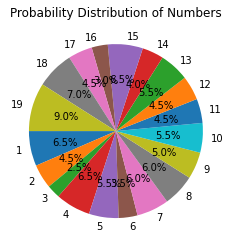

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a dataset
numbers = np.random.randint(1, 20, 200) 
counts = {num: list(numbers).count(num) for num in set(numbers)}

# Plot a pie chart 
plt.pie(
    counts.values(),
    labels=counts.keys(),
    autopct="%1.1f%%",
    startangle=180
)
plt.title("Probability Distribution of Numbers")
plt.show()

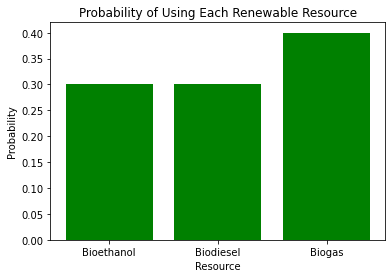

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

# Simulated resource usage data
resources = ['Bioethanol', 'Biodiesel', 'Biogas', 'Bioethanol', 'Biogas', 
             'Biodiesel', 'Biodiesel', 'Biogas', 'Bioethanol', 'Biogas']

# Count occurrences
resource_counts = Counter(resources)
total = sum(resource_counts.values())
probabilities = {res: count / total for res, count in resource_counts.items()}

plt.bar(probabilities.keys(), probabilities.values(), color='green')
plt.title("Probability of Using Each Renewable Resource")
plt.ylabel("Probability")
plt.xlabel("Resource")
plt.show()

## Simulating Real-Life Scenarios

Toss Counts: {'Heads': 103, 'Tails': 97}
Probability of Heads: 0.52


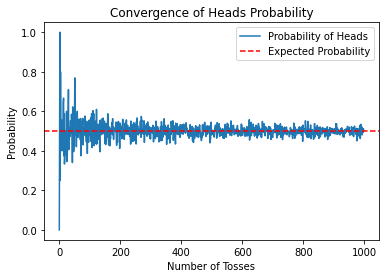

In [9]:
import numpy as np
import matplotlib.pyplot as plt

outcomes = ['Heads', 'Tails']
tosses = np.random.choice(outcomes, size=200)

# Probability of Heads using a dictionary
toss_counts = {outcome: np.sum(tosses == outcome) for outcome in outcomes}
print(f"Toss Counts: {toss_counts}")
prob_heads = toss_counts['Heads'] / len(tosses)
print(f"Probability of Heads: {prob_heads:.2f}")
probabilities = []
for i in range(1, 1000):
    tosses = np.random.choice(outcomes, size=i)
    probabilities.append(np.sum(tosses == 'Heads') / i)

plt.plot(probabilities, label="Probability of Heads")
plt.axhline(y=0.5, color='r', linestyle='--', label="Expected Probability")
plt.title("Convergence of Heads Probability")
plt.xlabel("Number of Tosses")
plt.ylabel("Probability")
plt.legend()
plt.show()


In [10]:
import numpy as np

weather_conditions = ['Sunny', 'Rainy', 'Cloudy'] 
weather_probs = [0.5, 0.3, 0.2]  
infestations = []

for _ in range(50):  # 50 days
    weather = np.random.choice(weather_conditions, p=weather_probs)
    if weather == 'Sunny':
        infestations.append(np.random.choice([0, 1], p=[0.9, 0.1]))  
    elif weather == 'Rainy':
        infestations.append(np.random.choice([0, 1], p=[0.6, 0.4]))  
    else:
        infestations.append(np.random.choice([0, 1], p=[0.8, 0.2]))  

# Calculate overall infestation probability
prob_infestation = sum(infestations) / len(infestations)
print(f"Overall Probability of Pest Infestation: {prob_infestation:.2%}")

Overall Probability of Pest Infestation: 24.00%


## 